In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv("C:/Users/kisho/Datasets/Resale_Flat_Price.csv")

In [94]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [95]:
df.shape

(911244, 11)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911244 entries, 0 to 911243
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                911244 non-null  object 
 1   town                 911244 non-null  object 
 2   flat_type            911244 non-null  object 
 3   block                911244 non-null  object 
 4   street_name          911244 non-null  object 
 5   storey_range         911244 non-null  object 
 6   floor_area_sqm       911244 non-null  float64
 7   flat_model           911244 non-null  object 
 8   lease_commence_date  911244 non-null  int64  
 9   resale_price         911244 non-null  float64
 10  remaining_lease      202194 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.5+ MB


In [97]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

# Feature Engineering

In [98]:
df['remaining_lease'].isna().sum()

709050

In [99]:
df.drop('remaining_lease',axis=1,inplace=True)

In [100]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [101]:
for col in cat_cols:
    print(f'{col} - {len(df[col].unique())}')

month - 406
town - 27
flat_type - 8
block - 2690
street_name - 582
storey_range - 25
flat_model - 34


In [102]:
df.drop(['block','street_name'],axis=1,inplace=True)

In [103]:
df['year'] = df['month'].apply(lambda x: int(x[:4]))
df['month'] = df['month'].apply(lambda x: int(x[-2:]))

In [104]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,1990
2,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,1990
3,1,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,1990
4,1,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990


In [105]:
df.isna().sum()

month                  0
town                   0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year                   0
dtype: int64

# Vizualization

<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

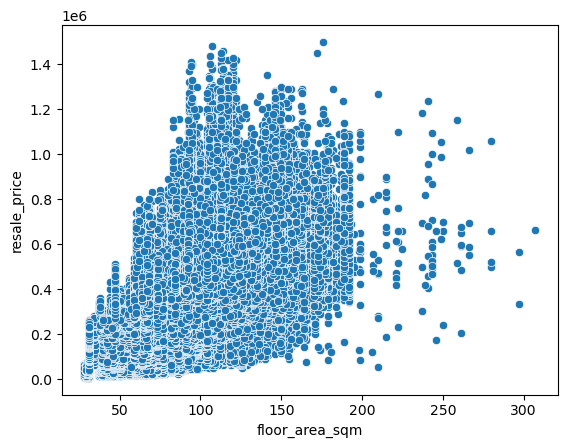

In [14]:
sns.scatterplot(data=df,x='floor_area_sqm',y='resale_price')

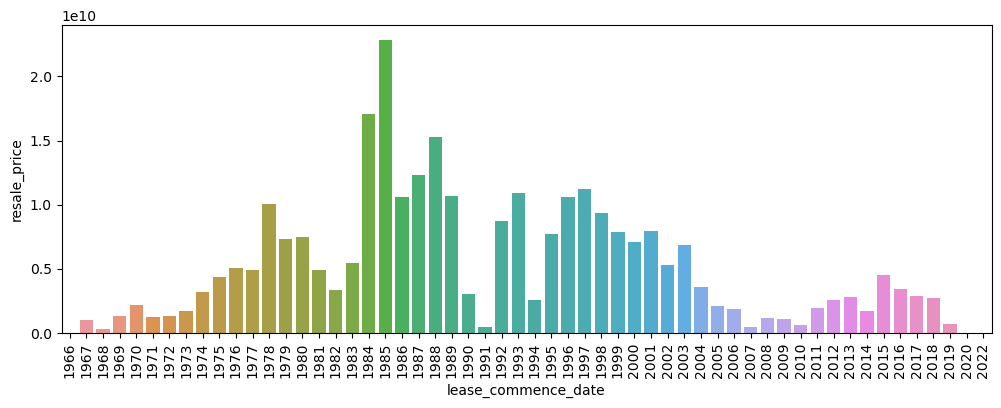

In [15]:
plt.figure(figsize=(12,4))
a = df.groupby('lease_commence_date')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data=a,x=a.index,y='resale_price')
plt.xticks(rotation=90)
plt.show()

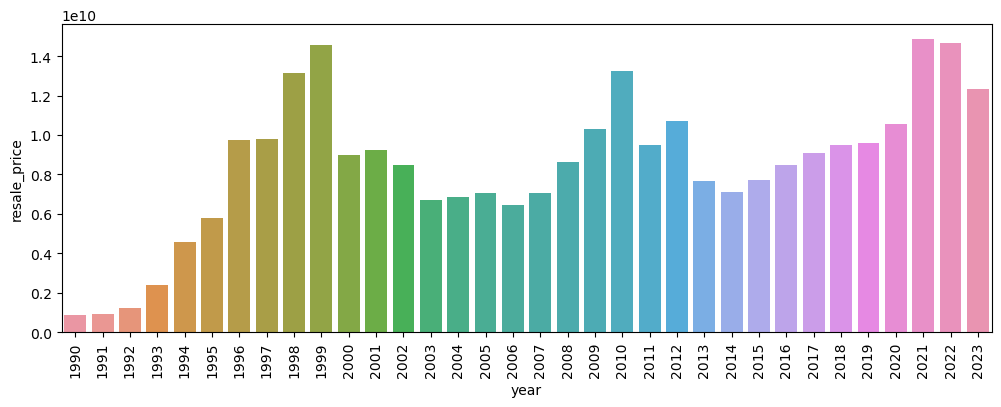

In [16]:
plt.figure(figsize=(12,4))
a = df.groupby('year')['resale_price'].sum()
a = pd.DataFrame(a)
sns.barplot(data=a,x=a.index,y='resale_price')
plt.xticks(rotation=90)
plt.show()

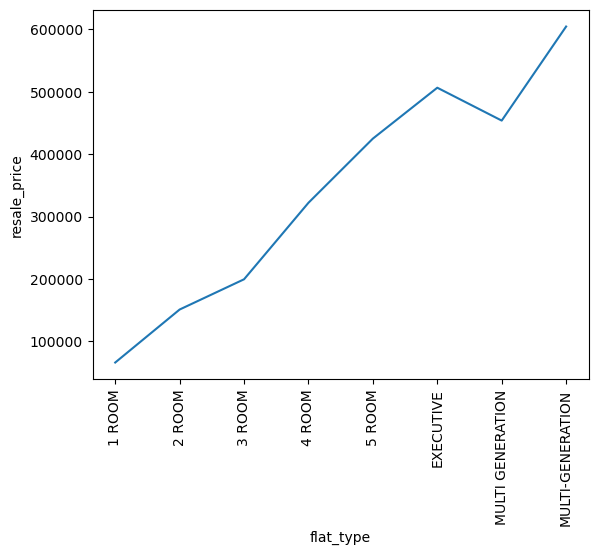

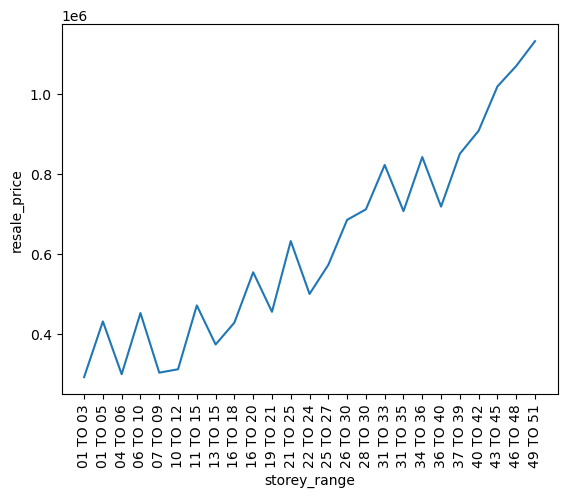

In [106]:
def line(col):
    a = df.groupby(col)['resale_price'].mean()
    a = pd.DataFrame(a)
    sns.lineplot(data=a,x=a.index,y='resale_price')
    plt.xticks(rotation=90)
    plt.show()
for col in ['flat_type', 'storey_range']:
    line(col)

<Axes: >

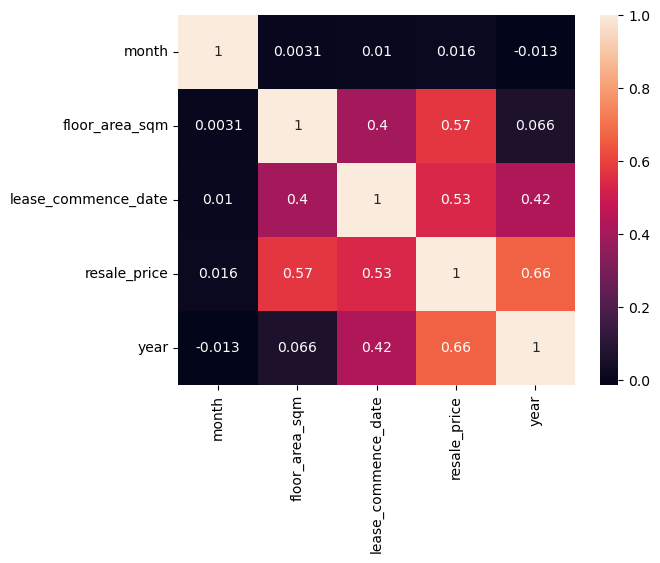

In [18]:
sns.heatmap(df.corr(),annot=True)

# Resale price over years

<Axes: xlabel='year'>

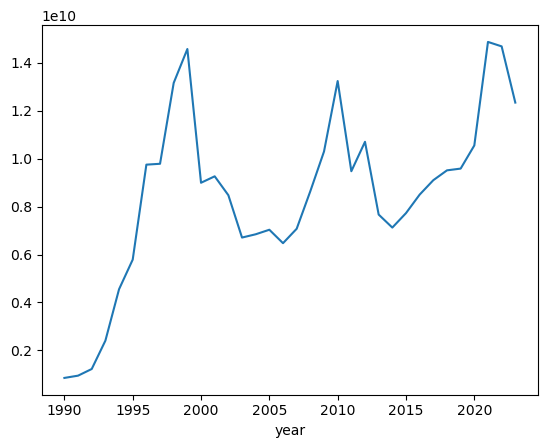

In [65]:
df.groupby('year').sum()['resale_price'].plot(kind='line')

<Axes: xlabel='lease_commence_date'>

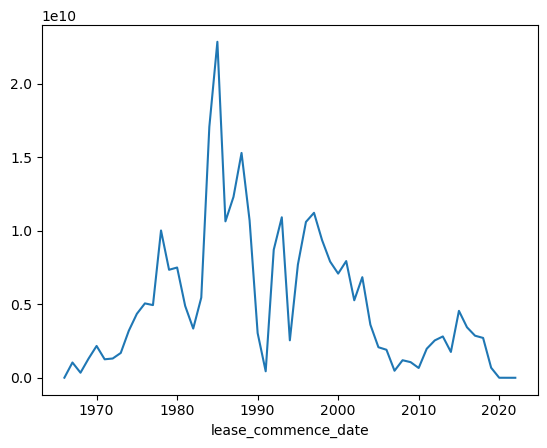

In [61]:
df.groupby('lease_commence_date').sum()['resale_price'].plot(kind='line')

In [21]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,1990
2,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,1990
3,1,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,1990
4,1,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990


# Model Creation

In [22]:
x = df.drop('resale_price',axis=1)
y = df['resale_price']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
from sklearn.preprocessing import OneHotEncoder
town_ohe = OneHotEncoder()
flat_type_ohe = OneHotEncoder()
storey_range_ohe = OneHotEncoder()
flat_model_ohe = OneHotEncoder()

In [26]:
town = town_ohe.fit_transform(x_train[['town']]).toarray()
flat_type = flat_type_ohe.fit_transform(x_train[['flat_type']]).toarray()
storey_range = storey_range_ohe.fit_transform(x_train[['storey_range']]).toarray()
flat_model = flat_model_ohe.fit_transform(x_train[['flat_model']]).toarray()

In [27]:
x_train.drop(['town','flat_type','storey_range','flat_model'],axis=1,inplace=True)

In [28]:
x_train = np.concatenate([x_train.values,town,flat_type,storey_range,flat_model],axis=1)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

# Transforming Testing data

In [30]:
town = town_ohe.transform(x_test[['town']]).toarray()
flat_type = flat_type_ohe.transform(x_test[['flat_type']]).toarray()
storey_range = storey_range_ohe.transform(x_test[['storey_range']]).toarray()
flat_model = flat_model_ohe.transform(x_test[['flat_model']]).toarray()

In [31]:
x_test.drop(['town','flat_type','storey_range','flat_model'],axis=1,inplace=True)

In [32]:
x_test = np.concatenate([x_test.values,town,flat_type,storey_range,flat_model],axis=1)

In [33]:
x_test = scaler.transform(x_test)

# Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
predictions = lr.predict(x_test)

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_test,predictions)

0.8567338742873163

In [40]:
pred = lr.predict(x_train)
r2_score(y_train,pred)

0.8568417092549385

# Decision Tree Model

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [42]:
r2_score(y_test,y_pred)

0.9625239364431046

In [43]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)/df['resale_price'].max()

0.014175044674003157

In [44]:
yt_pred = dt.predict(x_train)
r2_score(y_train,yt_pred)

0.9984448789428593

# Testing a new datapoint

In [45]:
df.columns

Index(['month', 'town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'year'],
      dtype='object')

In [46]:
month = 7
town = 'JURONG EAST'
flat_type = '4 ROOM'
storey_range = '13 TO 15'
floor_area_sqm = 91.0
flat_model = 'Model A2'
lease_commence_date = 1998
year = 2014

In [47]:
town = town_ohe.transform([[town]]).toarray()
flat_type = flat_type_ohe.transform([[flat_type]]).toarray()
storey_range = storey_range_ohe.transform([[storey_range]]).toarray()
flat_model = flat_model_ohe.transform([[flat_model]]).toarray()

In [48]:
month = np.array([[month]])
floor_area_sqm = np.array([[floor_area_sqm]])
lease_commence_date = np.array([[lease_commence_date]])
year = np.array([[year]])

In [49]:
x = np.concatenate([month, floor_area_sqm, lease_commence_date, year,town, flat_type, storey_range, flat_model],axis=1)

In [50]:
x = scaler.transform(x)

In [51]:
x

array([[0.54545455, 0.22580645, 0.59259259, 0.72727273, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [52]:
dt.predict(x)

array([428000.])

In [53]:
df.iloc[701244]

month                            7
town                   JURONG EAST
flat_type                   4 ROOM
storey_range              13 TO 15
floor_area_sqm                91.0
flat_model                Model A2
lease_commence_date           1998
resale_price              495000.0
year                          2014
Name: 701244, dtype: object

# Creating Pickle files

In [54]:
import pickle

with open('Resale_flat_price.pkl','wb') as f:
    pickle.dump(dt,f)
with open('town_ohe.pkl','wb') as f:
    pickle.dump(town_ohe,f)
with open('flat_type_ohe.pkl','wb') as f:
    pickle.dump(flat_type_ohe,f)
with open('storey_range_ohe.pkl','wb') as f:
    pickle.dump(storey_range_ohe,f)
with open('flat_model_ohe.pkl','wb') as f:
    pickle.dump(flat_model_ohe,f)
with open('Resale_flat_scaler.pkl','wb') as f:
    pickle.dump(scaler,f)